In [122]:
%load_ext autoreload
%autoreload 2
import sys, os
import re
from tarfuncs import *
import numpy as np

from chi2 import *

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import *

mpl.rcParams['figure.figsize'] = [8.0, 6.0]
mpl.rcParams['figure.dpi'] = 80
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['font.size'] = 15

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [108]:
files = []
widths = []
path = "/home/jean/RomalisResearch/pulsed_fitter_current/Results/"
for file in os.listdir(path):
    if "_2018-12-28_21" in file and ".gz" in file:
        files.append(path+"/"+file[:-3])
        widths.append(float(re.findall('\d+', file[:2])[0]))
widths = np.array(widths)
files = np.array(files)

In [87]:
initialfitting_files = []
fitPhases_files = []
corrphases_files = []
correctphases_files = []
for f in files:
    untar(f)
    filelist = os.listdir(f)
    initialfitting_files.extend([f+"/"+fi for fi in filelist if 'initialfitting' in fi])
    fitPhases_files.extend([f+"/"+fi for fi in filelist if 'fitPhases' in fi])
    corrphases_files.extend([f+"/"+fi for fi in filelist if 'corrphase' in fi])
    correctphases_files.extend([f+"/"+fi for fi in filelist if 'correctphase' in fi])

Something's already extracted there!
Something's already extracted there!
Something's already extracted there!
Something's already extracted there!
Something's already extracted there!
Something's already extracted there!
Something's already extracted there!


In [89]:
initialfitting_arr = []

# Parameters from partial fitting
amp1_arr = []; freq1_arr = []; phase1_arr = []; 
amp2_arr = []; freq2_arr = []; phase2_arr = []; 
slope_arr = []; offset_arr = [];

amp1_err = []; freq1_err = []; phase1_err = []; 
amp2_err = []; freq2_err = []; phase2_err = []; 
slope_err = []; offset_err = [];

times_arr = [];

datafit_arr = []; dataPara_x_arr = []; dataPara_y_arr = [];

for f in initialfitting_files:
    initialfitting_arr.append(np.load(f))
    paraOut_arr = initialfitting_arr[-1]['paraOut_arr']
    errtout_arr = initialfitting_arr[-1]['errtout_arr']

    amp1_arr.append(paraOut_arr[:, 0]); freq1_arr.append(paraOut_arr[:, 1]); phase1_arr.append(paraOut_arr[:, 2]); 
    amp2_arr.append(paraOut_arr[:, 3]); freq2_arr.append(paraOut_arr[:, 4]); phase2_arr.append(paraOut_arr[:, 5]); 
    slope_arr.append(paraOut_arr[:, 6]); offset_arr.append(paraOut_arr[:, 7]);

    amp1_err.append(errtout_arr[:, 0]); freq1_err.append(errtout_arr[:, 1]); phase1_err.append(errtout_arr[:, 2]); 
    amp2_err.append(errtout_arr[:, 3]); freq2_err.append(errtout_arr[:, 4]); phase2_err.append(errtout_arr[:, 5]); 
    slope_err.append(errtout_arr[:, 6]); offset_err.append(errtout_arr[:, 7]);
    
    times_arr.append(initialfitting_arr[-1]['times'])
    
    datafit_arr.append(initialfitting_arr[-1]['datafit2']); dataPara_x_arr.append(initialfitting_arr[-1]['dataPara_x']); dataPara_y_arr.append(initialfitting_arr[-1]['dataPara_y']); 

amp1_arr = np.array(amp1_arr); freq1_arr = np.array(freq1_arr); phase1_arr = np.array(phase1_arr);
amp2_arr = np.array(amp2_arr); freq2_arr = np.array(freq2_arr); phase2_arr = np.array(phase2_arr);
slope_arr = np.array(slope_arr); offset_arr = np.array(offset_arr);

amp1_err = np.array(amp1_err); freq1_err = np.array(freq1_err); phase1_err = np.array(phase1_err);
amp2_err = np.array(amp2_err); freq2_err = np.array(freq2_err); phase2_err = np.array(phase2_err);
slope_err = np.array(slope_err); offset_err = np.array(offset_err);

times_arr = np.array(times_arr);

datafit_arr = np.array(datafit_arr); dataPara_x_arr = np.array(dataPara_x_arr); dataPara_y_arr = np.array(dataPara_y_arr)

In [90]:
# Fitting phases correct by 2Pi (NOT CORRECTED PHASES)

fitPhases_arr = []

#   slope of fit to phases;  offset of slope to phases; error of slope; error of offset; chi2 of fit;
phi1_slope_arr = []; phi1_offset_arr = []; phi1_slope_err = []; phi1_offset_err = []; chi21_arr = [];
phi2_slope_arr = []; phi2_offset_arr = []; phi2_slope_err = []; phi2_offset_err = []; chi22_arr = [];
r_arr = []; # g ratio ratio

for f in fitPhases_files:
    fitPhases_arr.append(np.load(f))
    phi1_fit = fitPhases_arr[-1]['phi1_fit']; phi1_err = fitPhases_arr[-1]['phi1_fit_err'];
    phi1_slope_arr.append(phi1_fit[0]); phi1_slope_err.append(phi1_err[0]);
    
    phi2_fit = fitPhases_arr[-1]['phi2_fit']; phi2_err = fitPhases_arr[-1]['phi2_fit_err'];
    phi2_slope_arr.append(phi2_fit[0]); phi2_slope_err.append(phi2_err[1]);
    
    r_chi21_chi22 = fitPhases_arr[-1]['r_chi21_chi22']
    r_arr.append(r_chi21_chi22[0])
    chi21_arr.append(r_chi21_chi22[1]); chi22_arr.append(r_chi21_chi22[1]);
    
phi1_slope_arr = np.array(phi1_slope_arr); phi1_offset_arr = np.array(phi1_offset_arr); phi1_slope_err = np.array(phi1_slope_err); phi1_offset_err = np.array(phi1_offset_err); chi21_arr = np.array(chi21_arr);
phi2_slope_arr = np.array(phi2_slope_arr); phi2_offset_arr = np.array(phi2_offset_arr); phi2_slope_err = np.array(phi2_slope_err); phi2_offset_err = np.array(phi2_offset_err); chi22_arr = np.array(chi22_arr);
r_arr = np.array(r_arr);

In [91]:
correctphases_arr = []

# phase 1; phase 2 (corrected by 2Pi's)
phi1_arr = []; phi2_arr = []

for f in correctphases_files:
    correctphases_arr.append(np.load(f))
    phi1_arr.append(correctphases_arr[-1]['phi1_arr']); phi2_arr.append(correctphases_arr[-1]['phi2_arr'])
    
phi1_arr = np.array(phi1_arr); phi2_arr = np.array(phi2_arr)

In [92]:
corrphases_arr = []

# Corrected frequency; freq error; corrected phase offset; offset error
cf = []; cf_err = []; co = []; co_err = [];

for f in corrphases_files:
    corrphases_arr.append(np.load(f))
    cp_fit = corrphases_arr[-1]['cp_fit']; cp_fiterr = corrphases_arr[-1]['cp_fiterr']
    cf.append(cp_fit[0]); cf_err.append(cp_fiterr[0]);
    co.append(cp_fit[1]); co_err.append(cp_fiterr[1]);
    
cf = np.array(cf); cf_err = np.array(cf_err); co = np.array(co); co_err = np.array(co_err);

In [75]:
for f in files:
    tarFileAndRemove(f[:-3])

3.0


/home/jean/miniconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


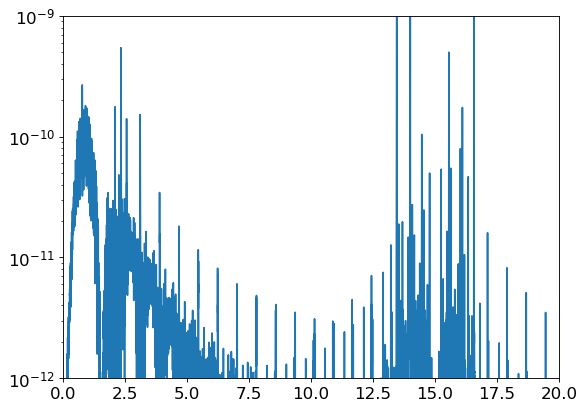

5.0


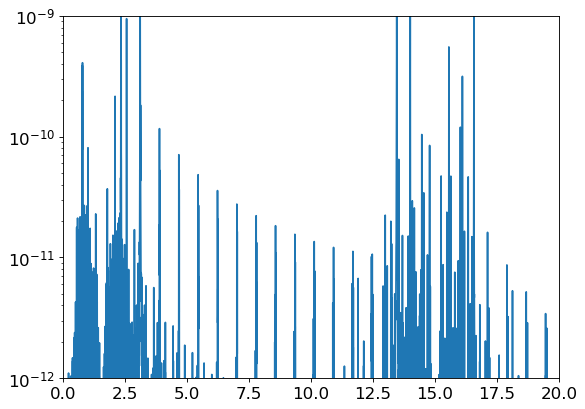

7.0


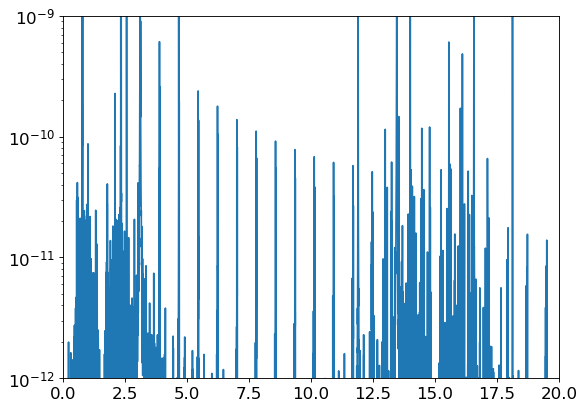

9.0


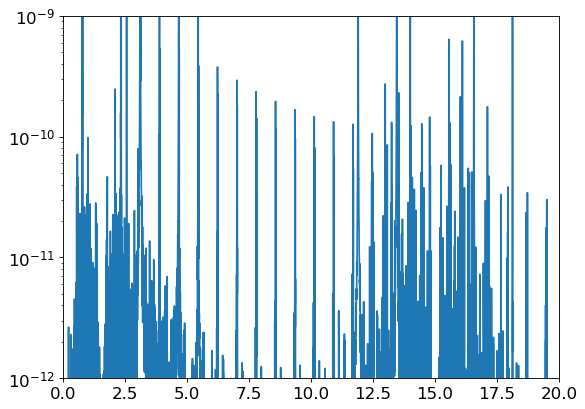

11.0


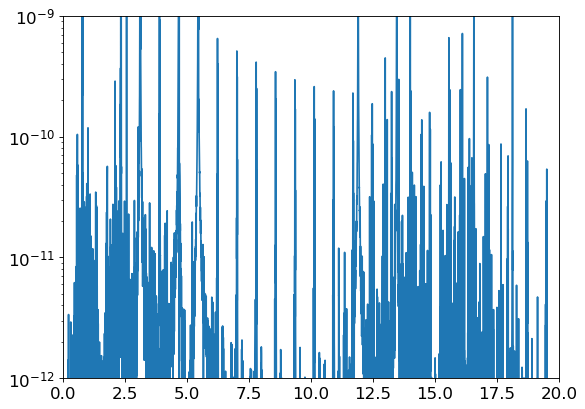

13.0


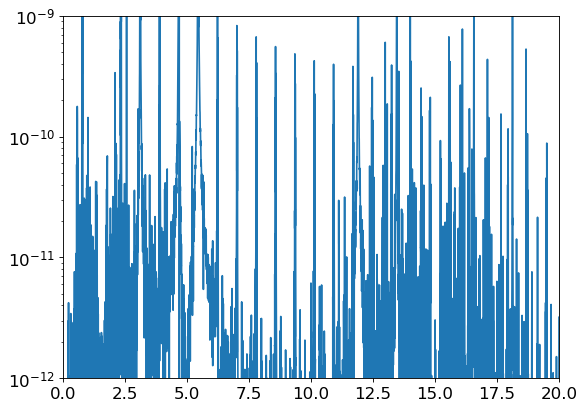

15.0


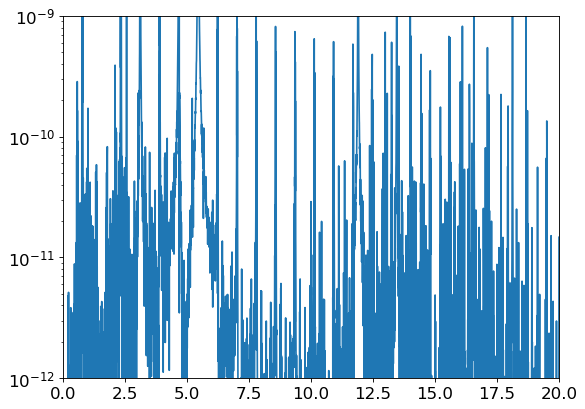

In [130]:
width_order = np.unravel_index(np.argsort(widths, axis=None), widths.shape)[0]
for i in width_order:
    print(widths[i])
    fft, f = getfft(datafit_arr[i] - dataPara_y_arr[i].flatten(), 1e-3)
    plt.plot(f, fft*np.conj(fft))
    plt.xlim(0,20)
    plt.ylim(1e-12, 1e-9)
    plt.yscale("log")
    plt.show()